In [1]:
""" Cualquier librería adicional que necesiteis durante el ejercicio, importadlo en esta sección """

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math

sns.set_style('darkgrid')
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Ejercicio 2

Este ejercicio pretende poner en práctica la habilidad de limpiar datos y visualizar plots en para crear finalmente modelos en __sklearn__.

El estudiante tendrá que repasar los comandos realizados en clase y lidiar con posibles errores durante el desarrollo. 

Para facilitar y agilizar el desarrollo, el estudiante tendrá que rellenar los huecos marcados como '_# codigo-alumno_'. No obstante, si además el estudiante necesita ejecutar código adicional, siempre podrá utilizar cualquier celda intermedia. 

El estudiante tendrá siempre que introducir una semilla (seed) que generará acorde a su fecha de nacimiento (sin ser intrusivos en edad).

Finalmente, la entrega será un fichero .ipynb cambiando nombre y apellido al fichero.

In [2]:
""" El estudiante tendrá que utilizar la semilla proporcionada para todos los procesos aleatorios """

seed = 22 + 13 * 2

### Data cleansing

In [3]:
""" Leed el dataframe de sklearn llamado 'fetch_kddcup99' y almacenarlo en una variable llamada data """

from sklearn.datasets import fetch_kddcup99

data = fetch_kddcup99(as_frame=True)
pd_data = data.frame
pd_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [4]:
""" De entre todas las variables del dataframe, solo trabajaremos en 
    este ejercicio con las descritas en key_columns, por lo que tendréis que quitar el resto """

key_columns = ['duration', 'protocol_type', 'service', 'flag', 'logged_in', 'count', 'srv_count', 'serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate', 'labels']

pd_data = pd_data[key_columns]
pd_data.head()

,duration,protocol_type,service,flag,logged_in,count,srv_count,serror_rate,dst_host_srv_count,dst_host_srv_serror_rate,labels
0,0,b'tcp',b'http',b'SF',1,8,8,0.0,9,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',1,8,8,0.0,19,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',1,8,8,0.0,29,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',1,6,6,0.0,39,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',1,6,6,0.0,49,0.0,b'normal.'


In [5]:
""" Comprobad que no haya nulos ni registros duplicados """
print(pd_data.isnull().sum())
print(pd_data.duplicated().sum())

duration                    0
protocol_type               0
service                     0
flag                        0
logged_in                   0
count                       0
srv_count                   0
serror_rate                 0
dst_host_srv_count          0
dst_host_srv_serror_rate    0
labels                      0
dtype: int64
439856


In [6]:
""" Como sí que hay registros duplicados, se procede a eliminarlos y se comprueba después """
pd_data=pd_data.drop_duplicates()
print(pd_data.duplicated().sum())

0


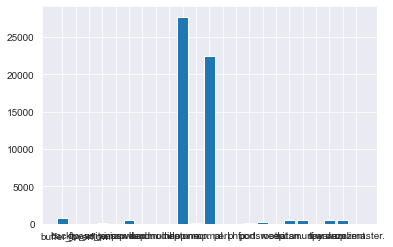

In [7]:
""" Mostrar un barplot para la variable objetivo (labels)"""

target = 'labels'

k=pd_data.groupby(target).size()
plt.bar(k.index,k)
plt.show()

In [8]:
""" Detectar en la variable labels las dos etiquetas más frecuentes, 
    los demás registros del dataset se eliminarán para este trabajo """

""" Las columnas de typo string poseen una b al comienzo que indica que son de tipo bytes.
    Para evitar problemas posteriores se convertirán estas columnas a string antes de comenzar"""

str_df = pd_data.select_dtypes([np.object])
str_df = str_df.stack().str.decode('utf-8').unstack()

""" Se hace un loop para comprobar las columnas bien convertidas e insertarlas en el dataframe
    a emplear"""
for col in str_df:
    if str_df[col].isnull().sum()==0:
        pd_data[col] = str_df[col]

""" Se extraen las categorías de labels con mayor número de ocurrencias y se conservan sólo estas"""
two_variables=pd_data[target].value_counts()[:2].index.tolist()
pd_data = pd_data[(pd_data["labels"].str.contains(str(two_variables[0])) == True) |
                    (pd_data["labels"].str.contains(str(two_variables[1])) == True)]

print(len(pd_data))
pd_data.groupby(target).size().sort_values(ascending=False)

50177


labels
neptune.    27722
normal.     22455
dtype: int64

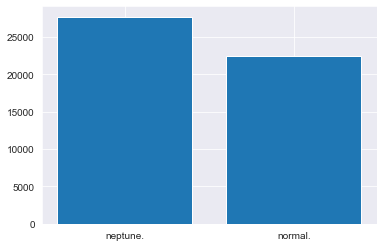

In [9]:
""" Volved a mostrar el barplot para la variable objetivo (labels) """

target = 'labels'

k=pd_data.groupby(target).size()
plt.bar(k.index,k)
plt.show()

In [10]:
""" Separaremos las variables categóricas de las numéricas """

num_cols = ['duration', 'count', 'srv_count', 'serror_rate', 'dst_host_srv_count', 'dst_host_srv_serror_rate']
cat_cols = ['protocol_type', 'service', 'flag', 'logged_in']

pd_data[num_cols] = pd_data[num_cols].astype(float)

In [11]:
""" Mostrad 3 histogramas por cada variable numérica:
    - Uno con el valor de la variable 
    - Uno con el valor de la variable transformada por Box-Cox (si es viable)
    - Uno con el valor de la variable transformada por Yeo-Johnson """

""" La transformación de Box-Cox sólo se puede llevar a cabo con datos estrictamente positivos
    por lo que se comprobará cuántos registros de las variables numéricas tienen valores <= 0 """
for col in num_cols:
    if len(pd_data[pd_data[col]<=0].index)!=0:
        print(len(pd_data[pd_data[col]<=0].index))

""" De las variables numéricas hay 3 que sólo  poseen 1 o  2 registros inferiores a 0. Como es
    una proporción totalmente despreciable se eliminarán estos registros y así se podrá llevar a 
    cabo la transformación """
for col in num_cols:
    if len(pd_data[pd_data[col]<=0].index)<=2:
        pd_data.drop(pd_data[pd_data[col]<=0].index, inplace=True)

42875
1
1
26852
2
24732


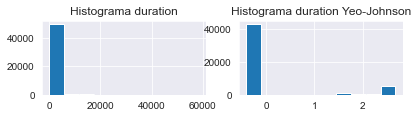

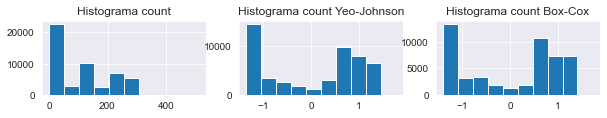

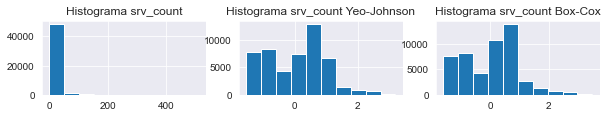

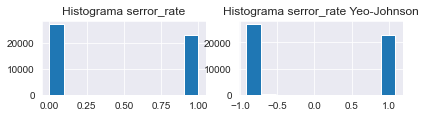

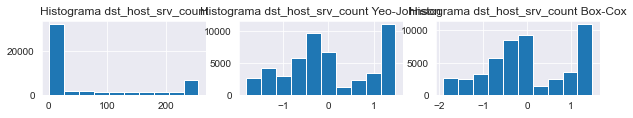

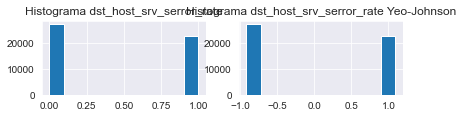

In [12]:
""" Se crea un bucle for para cada una de las variables numéricas construyendo ambos tipos de 
    PowerTransformer y mostrando cada uno de los histogramas excepto en aquellas variables que 
    sí poseen datos negativos o 0"""

for col in num_cols:
    
    col_transformer1 = ColumnTransformer([
            ("transformer", PowerTransformer(method='yeo-johnson'), [col])
        ]
    )

    col_transformer2 = ColumnTransformer([
            ("transformer", PowerTransformer(method='box-cox'), [col])
        ]
    )

    plt.figure(figsize=(10,3))

    plt.subplot(2,3,1)
    plt.title("Histograma "+col)
    plt.hist(pd_data[col])

    plt.subplot(2,3,2)
    plt.title("Histograma "+col+ " Yeo-Johnson")
    ctransformed = col_transformer1.fit_transform(pd_data)
    plt.hist(ctransformed)

    if len(pd_data[pd_data[col]<=0].index)==0:
        plt.subplot(2,3,3)
        plt.title("Histograma "+col+ " Box-Cox")
        ctransformed = col_transformer2.fit_transform(pd_data)
        plt.hist(ctransformed)

In [13]:
""" Por la forma de los histogramas, podría ser un buen estudio convertir las variables
    numéricas a variables dummy, es lo que hareis en este apartado. En concreto, el alumno
    realizará una binarización de estas variables tomando el criterio que considere más apropiado """

""" La binarización que se llevará a cabo tomará como umbral de asignación la mediana """

for col in num_cols:
    umbral=np.median(pd_data[[col]])
    scaler=Binarizer(threshold=umbral)
    pd_data[col]=scaler.fit_transform(pd_data[[col]])

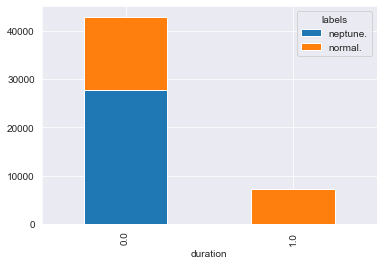

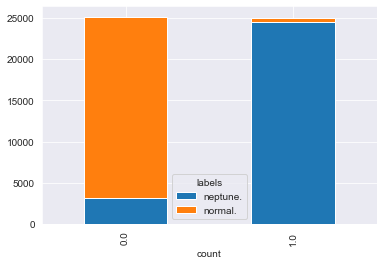

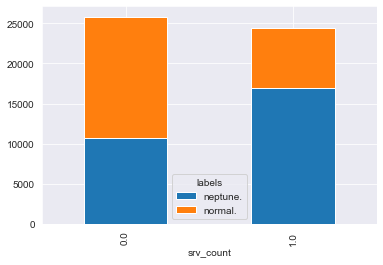

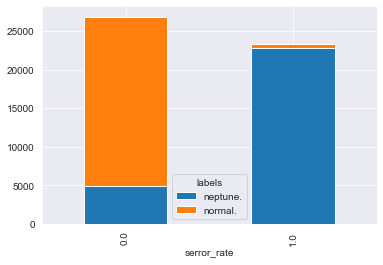

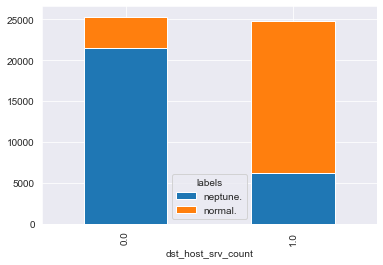

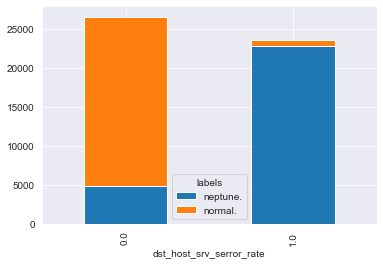

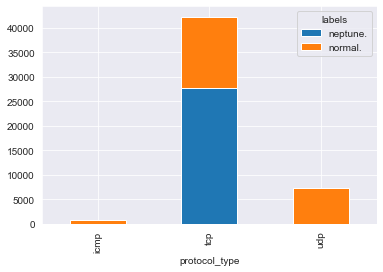

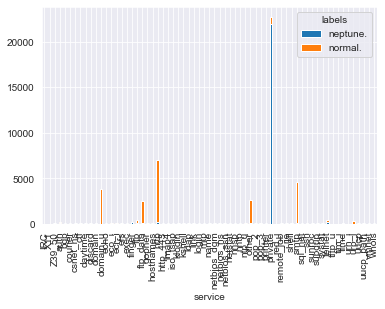

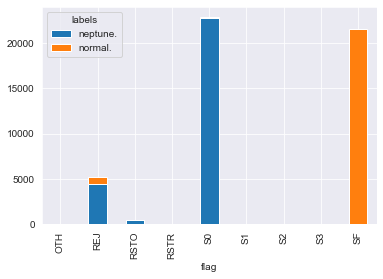

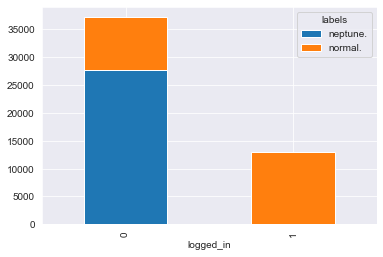

In [14]:
""" Mostrad un barplot por cada variable estratificado por la variable target """
for col in num_cols+cat_cols:
    df_plot = pd_data.groupby([col, target]).size().reset_index().pivot(columns=target, index=col, values=0)
    df_plot.plot(kind='bar', stacked=True)

In [15]:
""" Transformad la variable service en una variable dummy que nos permitan identificar el servicio
    más frecuente frente al resto """

""" Primero se obtiene cuál es el servicio con más registros y se almacena como string en la 
    variable title """
most_frequent=pd_data["service"].value_counts()[:1].index.tolist()
title=[most_frequent[0]]

""" Se crea un coltransformer para aplicarlo sobre la columna service """
col_transformer = ColumnTransformer([
        ("encoder", OneHotEncoder(categories=[title], handle_unknown="ignore"), ["service"])
    ]
)
pd_data[["service"]] = col_transformer.fit_transform(pd_data[["service"]])

""" Se modifica la columna para que en vez de haber 1 y 0 se coloquen los valores private y resto
    para después crear la variable dummy """
pd_data['service'] = np.where(pd_data['service']==1, most_frequent[0], 'resto')
pd_data=pd.get_dummies(pd_data, columns=["service"])
pd_data.drop('service_resto', axis=1, inplace=True)

pd_data.groupby('service').size().sort_values(ascending=False)

In [16]:
""" Transformad la variable flag en dos variables dummy que nos permitan identificar 3 tipos de flags, 
    los dos más comunes y el resto """

""" Primero se obtiene cuales son las flags con más registros """
most_common=pd_data["flag"].value_counts()[:2].index.tolist()

""" Se crean dummies a partir de la columna flag """
pd_data=pd.get_dummies(pd_data, columns=["flag"])

""" Se almacenan las nuevas columnas que se quieren eliminar y se procede a ello """
cols_to_delete=['flag_OTH', 'flag_REJ', 'flag_RSTO','flag_RSTR', 'flag_S1', 'flag_S2', 'flag_S3']
pd_data.drop(cols_to_delete, axis=1, inplace=True)

pd_data.groupby('flag').size().sort_values(ascending=False)

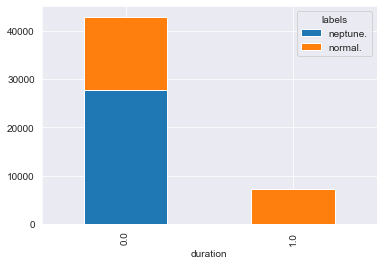

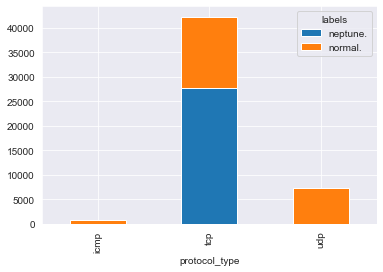

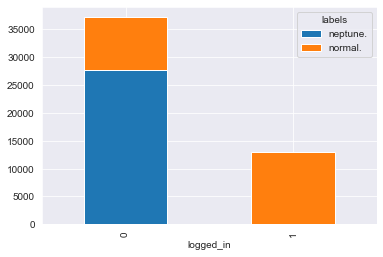

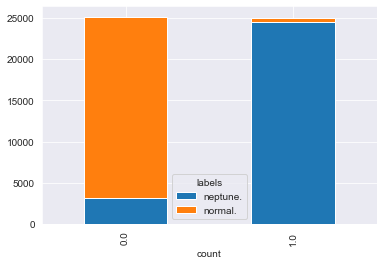

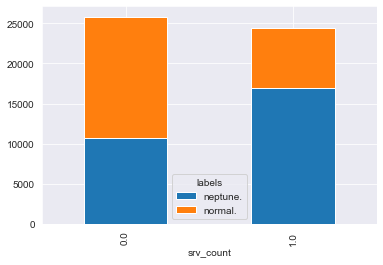

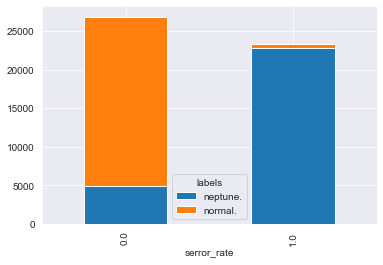

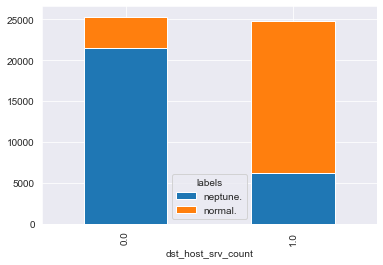

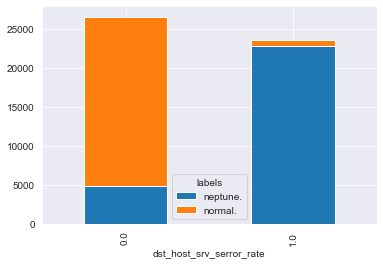

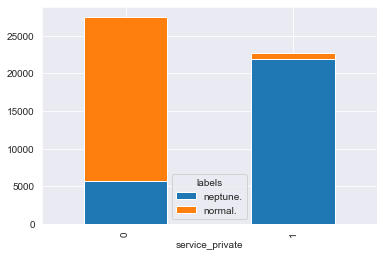

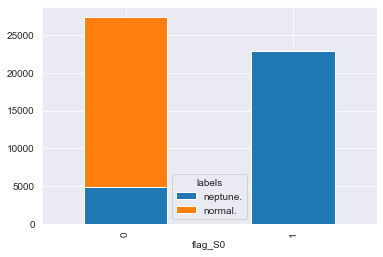

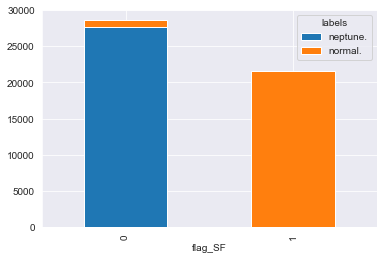

In [17]:
""" Volved a mostrad un barplot por cada variable estratificado por la variable target """
for col in list(pd_data.columns):
    if (col!= "labels"):
        df_plot = pd_data.groupby([col, target]).size().reset_index().pivot(columns=target, index=col, values=0)
        df_plot.plot(kind='bar', stacked=True)

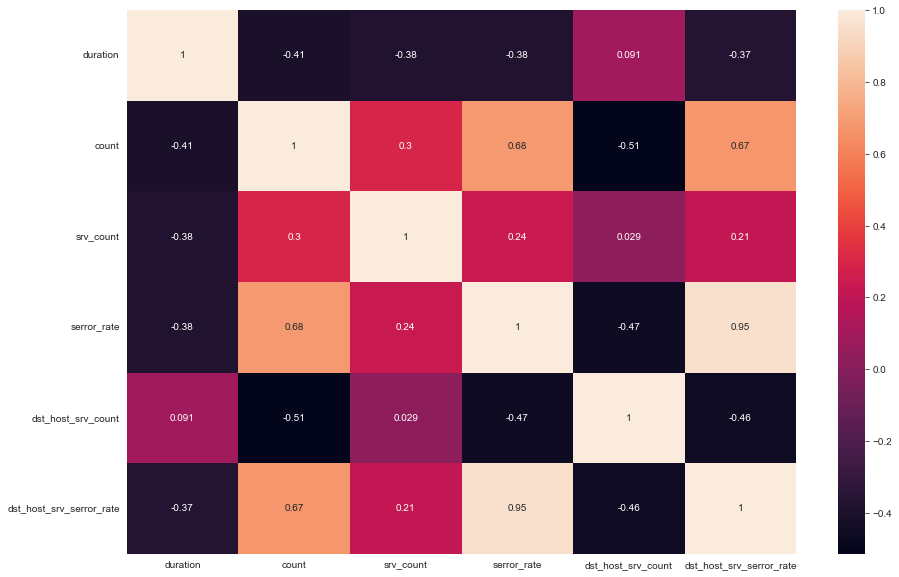

In [18]:
""" Mostrad un plot de correlaciones entre variables numéricas """

pd_data2=pd_data[num_cols]
plt.figure(figsize=(15,10))
sns.heatmap(pd_data[num_cols].corr(), annot=True)
plt.show()

In [19]:
""" Antes de empezar con la modelización, no os olvideis de eliminar duplicados """
pd_data=pd_data.drop_duplicates()

### Model 1

In [20]:
""" Función para generar los boxplots """

def boxplots_algorithms(results, names):
    
    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.show()

In [21]:
""" Modelos a usar """

models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier(random_state=seed)))
models.append(('RFC', RandomForestClassifier(random_state=seed)))

[[14  4]
 [17 87]]
LR: 0.828846 (0.083974)
***
[[15  6]
 [16 85]]
LDA: 0.821154 (0.084336)
***
[[10  3]
 [21 88]]
KNN: 0.803205 (0.066187)
***
[[17 11]
 [14 80]]
DTC: 0.795513 (0.097993)
***
[[15 10]
 [16 81]]
RFC: 0.787179 (0.083815)
***


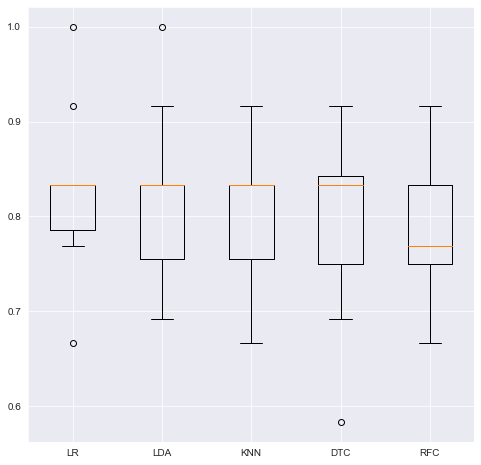

In [22]:
""" Realizad un ajuste de machine learning con las siguientes características:
    - probad 5 algoritmos en bucle y mostrar un boxplot con los resultados
    - usad la técnica de validación cruzada más acertada (10 folds) 
    - entrenad solo con variables numericas 
    - mostrad la matriz de confusión en cada caso """

X = pd_data[num_cols]
y = pd_data[target]

results = []
names = []

for name, model in models:
    
    pipeline = make_pipeline(model)
    
    cv_technique = KFold(n_splits=10, shuffle=True, random_state=seed) 
    cv_results = cross_val_score(pipeline, X, y, cv=cv_technique, scoring='accuracy')
    
    y_pred=cross_val_predict(model, X, y, cv=cv_technique)
    print(confusion_matrix(y_pred,y))
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print('***')
    
    results.append(cv_results)
    names.append(name)
    
boxplots_algorithms(results, names)

### Models 2

In [23]:
pd_data.dtypes

duration                    float64
protocol_type                object
logged_in                    object
count                       float64
srv_count                   float64
serror_rate                 float64
dst_host_srv_count          float64
dst_host_srv_serror_rate    float64
labels                       object
service_private               uint8
flag_S0                       uint8
flag_SF                       uint8
dtype: object

[[25  4]
 [ 6 87]]
LR: 0.917308 (0.037317)
***
[[25  5]
 [ 6 86]]
LDA: 0.909615 (0.042853)
***
[[25  4]
 [ 6 87]]
KNN: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
DTC: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
RFC: 0.917308 (0.037317)
***


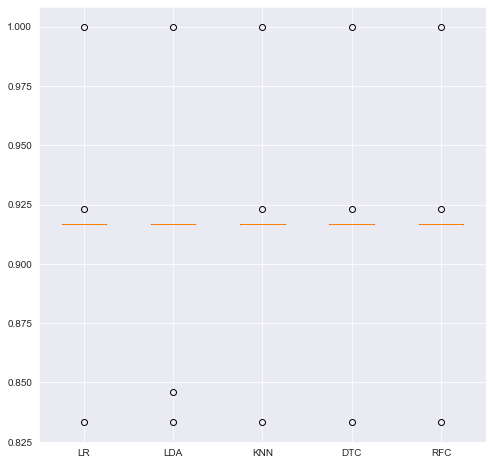

In [24]:
""" Realizad un ajuste de machine learning con las siguientes características:
    - probad 5 algoritmos en bucle y mostrar un boxplot con los resultados
    - usad la técnica de validación cruzada más acertada (10 folds) 
    - usad un pipeline que encadene 
        - One-hot-encoder con las variables tipo string
        - algortimo 
    - mostrad la matriz de confusión en cada caso """

X = pd_data.drop(target, axis=1) 
y = pd_data[target]

results = []
names = []

col_transformer = ColumnTransformer([
        ("encoder1", OneHotEncoder(), ['protocol_type', 'logged_in', 'service_private', 'flag_S0','flag_SF'])
    ]
)

for name, model in models:
    
    pipeline = make_pipeline(col_transformer, model)
    
    cv_technique = KFold(n_splits=10, shuffle=True, random_state=seed) 
    cv_results = cross_val_score(pipeline, X, y, cv=cv_technique, scoring='accuracy')
    
    y_pred=cross_val_predict(pipeline, X, y, cv=cv_technique)
    print(confusion_matrix(y_pred,y))
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print('***')
    
    results.append(cv_results)
    names.append(name)
    
boxplots_algorithms(results, names)

[[25  4]
 [ 6 87]]
LR: 0.917308 (0.037317)
***
[[25  6]
 [ 6 85]]
LDA: 0.900641 (0.062562)
***
[[27 11]
 [ 4 80]]
KNN: 0.877564 (0.074229)
***
[[25  4]
 [ 6 87]]
DTC: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
RFC: 0.917308 (0.037317)
***


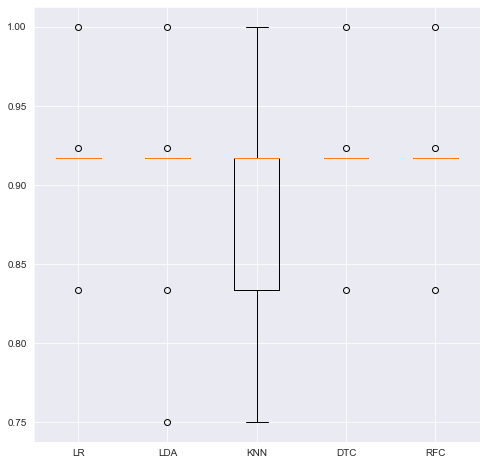

[[25  4]
 [ 6 87]]
LR: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
LDA: 0.917308 (0.037317)
***
[[27 11]
 [ 4 80]]
KNN: 0.877564 (0.074229)
***
[[25  4]
 [ 6 87]]
DTC: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
RFC: 0.917308 (0.037317)
***


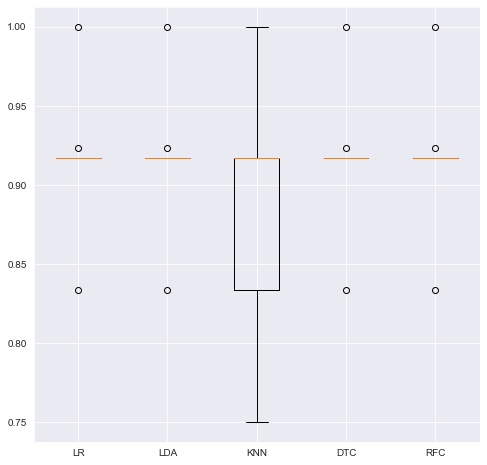

[[25  4]
 [ 6 87]]
LR: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
LDA: 0.917308 (0.037317)
***
[[28 11]
 [ 3 80]]
KNN: 0.886538 (0.062021)
***
[[25  4]
 [ 6 87]]
DTC: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
RFC: 0.917308 (0.037317)
***


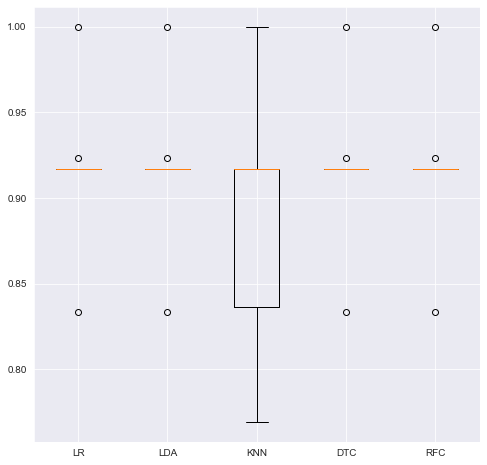

[[25  4]
 [ 6 87]]
LR: 0.917308 (0.037317)
***
[[25  5]
 [ 6 86]]
LDA: 0.909615 (0.042853)
***
[[28 12]
 [ 3 79]]
KNN: 0.878846 (0.070714)
***
[[25  4]
 [ 6 87]]
DTC: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
RFC: 0.917308 (0.037317)
***


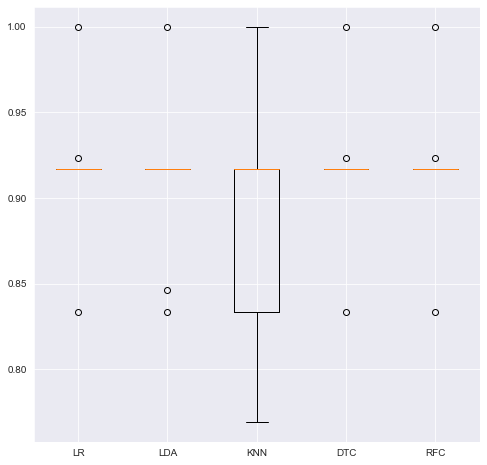

In [25]:
### Models 3

""" Realizad un ajuste de machine learning con las siguientes características:
    - probad 4 PCA dentro del pipeline y en bucle para n_components=2,3,4,5 
    - probad 5 algoritmos en bucle y mostrar un boxplot con los resultados
    - usad la técnica de validación cruzada más acertada (10 folds) 
    - usad un pipeline que encadene 
        - One-hot-encoder con las variables tipo string
        - pca
        - algortimo 
    - mostrad la matriz de confusión en cada caso """

X = pd_data.drop(target, axis=1) 
y = pd_data[target]

col_transformer = ColumnTransformer([
        ("encoder1", OneHotEncoder(), ['protocol_type', 'logged_in', 'service_private', 'flag_S0','flag_SF'])
    ]
)

for k in range(2,6):
    results = []
    names = []
    for name, model in models:
            pca=PCA(k)
            pipeline = make_pipeline(col_transformer, pca, model)

            cv_technique = KFold(n_splits=10, shuffle=True, random_state=seed) 
            cv_results = cross_val_score(pipeline, X, y, cv=cv_technique, scoring='accuracy')

            y_pred=cross_val_predict(pipeline, X, y, cv=cv_technique)
            print(confusion_matrix(y_pred,y))

            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)
            print('***')

            results.append(cv_results)
            names.append(name)

    boxplots_algorithms(results, names)

### Models 4

[[14  7]
 [17 84]]
LR: 0.801923 (0.112333)
***
[[21 10]
 [10 81]]
LDA: 0.834615 (0.083422)
***
[[17  4]
 [14 87]]
KNN: 0.851923 (0.087774)
***
[[21 10]
 [10 81]]
DTC: 0.834615 (0.083422)
***
[[21 10]
 [10 81]]
RFC: 0.834615 (0.083422)
***


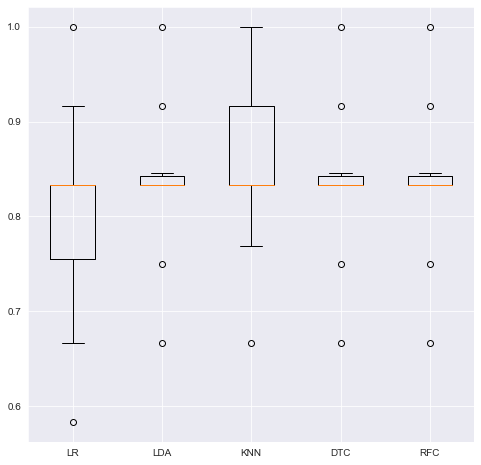

[[24  4]
 [ 7 87]]
LR: 0.908974 (0.045036)
***
[[24  4]
 [ 7 87]]
LDA: 0.908974 (0.045036)
***
[[24  4]
 [ 7 87]]
KNN: 0.908974 (0.045036)
***
[[24  4]
 [ 7 87]]
DTC: 0.908974 (0.045036)
***
[[24  4]
 [ 7 87]]
RFC: 0.908974 (0.045036)
***


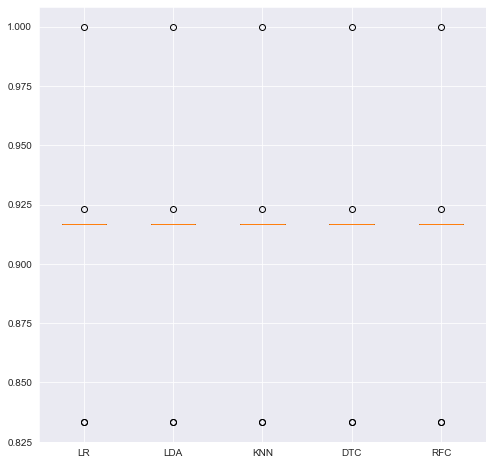

[[25  4]
 [ 6 87]]
LR: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
LDA: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
KNN: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
DTC: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
RFC: 0.917308 (0.037317)
***


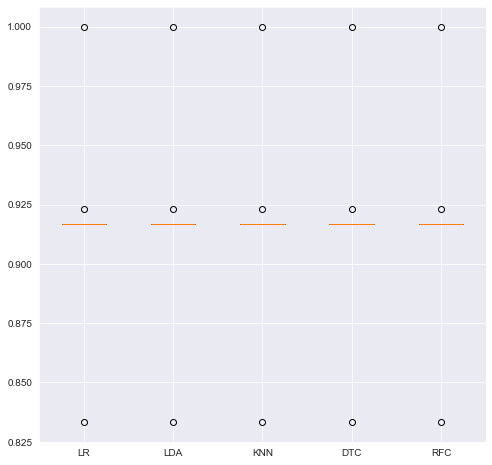

[[25  4]
 [ 6 87]]
LR: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
LDA: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
KNN: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
DTC: 0.917308 (0.037317)
***
[[25  4]
 [ 6 87]]
RFC: 0.917308 (0.037317)
***


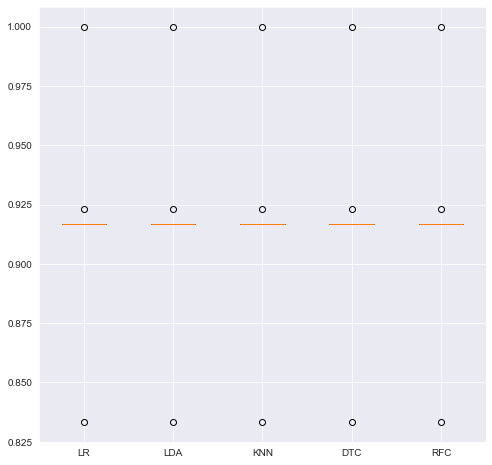

In [26]:
""" Realizad un ajuste de machine learning con las siguientes características:
    - probad 4 SelectKBest dentro del pipeline y en bucle para k=2,3,4,5 
    - probad 5 algoritmos en bucle y mostrar un boxplot con los resultados
    - usad la técnica de validación cruzada más acertada (10 folds) 
    - usad un pipeline que encadene 
        - One-hot-encoder con las variables tipo string
        - pca
        - algortimo 
    - mostrad la matriz de confusión en cada caso """

X = pd_data.drop(target, axis=1) 
y = pd_data[target]

col_transformer = ColumnTransformer([
        ("encoder1", OneHotEncoder(), ['protocol_type', 'logged_in', 'service_private', 'flag_S0','flag_SF'])
    ]
)

for k in range(2,6):
    results = []
    names = []
    for name, model in models:
            kbest=SelectKBest(chi2, k=k)
            pipeline = make_pipeline(col_transformer, kbest, model)

            cv_technique = KFold(n_splits=10, shuffle=True, random_state=seed) 
            cv_results = cross_val_score(pipeline, X, y, cv=cv_technique, scoring='accuracy')

            y_pred=cross_val_predict(pipeline, X, y, cv=cv_technique)
            print(confusion_matrix(y_pred,y))

            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)
            print('***')

            results.append(cv_results)
            names.append(name)

    boxplots_algorithms(results, names)

### Models 5

In [27]:
""" En esta parte, vamos a separar primero el dataset en train-test-val set. Es decir, 
    separaremos el 20% del dataset en el test-set con el que validaremos la calidad real del algortimo.
    Tras ello, solo con el train test, se pide realizar un ajuste de machine learning con las siguientes características:
    - usad el mejor algoritmo a vuestro juicio (pero se pide justificarlo)
    - usad la técnica de validación cruzada más acertada (10 folds) 
    - usad un pipeline que encadene 
        - One-hot-encoder con las variables tipo string
        - algortimo 
    Realizad la predicción de X_train y X_test para poder mostrar ambas matrices de confusión """

""" En base a los resultado anteriores, parece que el algoritmo de KNN es de los que usualmente
    ofrece peores resultados junto con LDA. Por el contrario, los algoritmos de logistic
    regression, decission trees y random forest son los que parecen mostrarse más consistentes
    a lo largo de las comprobaciones. Se escogerá usar RFC como algoritmo favorito en este apartado
    ya que su boxplot se mantiene muy cercano a valores de 1 con barras de error moderadas"""

X = pd_data.drop(target, axis=1) 
y = pd_data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=seed)

col_transformer = ColumnTransformer([
        ("encoder1", OneHotEncoder(), ['protocol_type', 'logged_in', 'service_private', 'flag_S0','flag_SF'])
    ]
)

""" Ajuste machine learning """

model = RandomForestClassifier(random_state=seed)
pipeline = make_pipeline(col_transformer, model)

cv_technique = KFold(n_splits=10, shuffle=True, random_state=seed) 
cv_results = cross_val_score(pipeline, X_train, y_train, cv=cv_technique, scoring='accuracy')

y_pred=cross_val_predict(pipeline, X_train, y_train, cv=cv_technique)
print(confusion_matrix(y_pred,y_train))

print('***')

""" Predicción con fit y predict """
pipeline.fit(X_train, y_train)

y_pred=pipeline.predict(X_test)
results=accuracy_score(y_test, y_pred)
results=classification_report(y_test,y_pred)
results=confusion_matrix(y_test, y_pred)
print(results)

[[21  7]
 [ 5 64]]
***
[[ 4  1]
 [ 0 20]]


### Models 6

In [28]:
""" En esta parte, vamos a separar primero el dataset en train-test-val set. Es decir, 
    separaremos el 20% del dataset en el test-set con el que validaremos la calidad real del algortimo.
    Tras ello, solo con el train test, se pide realizar un ajuste de machine learning con las siguientes características:
    - usad el mejor algoritmo a vuestro juicio
    - usad la técnica de validación cruzada más acertada (10 folds) 
    - usad un pipeline que encadene 
        - Column transformer aplicado a solo a algunas columnas (no todas) que más nos interesen, para realizar:
            - One-hot-encoder si son tipo variables tipo string
            - Robust-scaler si son tipo numéricas
            - Transformación Yeo-johnson si son tipo numéricas
            - algortimo 
    Realizad la predicción de X_train y X_test para poder mostrar ambas matrices de confusión """

X = pd_data.drop(target, axis=1) 
y = pd_data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=seed)

col_transformer = ColumnTransformer([
        ("encoder1", OneHotEncoder(), ['protocol_type', 'logged_in', 'service_private', 'flag_S0','flag_SF']),
        ("scaler", RobustScaler(), num_cols),
        ("transformer", PowerTransformer(), num_cols)
    ]
)

""" Ajuste machine learning """

model = RandomForestClassifier(random_state=seed)
pipeline = make_pipeline(col_transformer, model)

cv_technique = KFold(n_splits=10, shuffle=True, random_state=seed) 
cv_results = cross_val_score(pipeline, X_train, y_train, cv=cv_technique, scoring='accuracy')

y_pred=cross_val_predict(pipeline, X_train, y_train, cv=cv_technique)
print(confusion_matrix(y_pred,y_train))

print('***')

""" Predicción con fit y predict """
pipeline.fit(X_train, y_train)

y_pred=pipeline.predict(X_test)
results=accuracy_score(y_test, y_pred)
results=classification_report(y_test,y_pred)
results=confusion_matrix(y_test, y_pred)
print(results)

[[23  3]
 [ 3 68]]
***
[[ 3  2]
 [ 1 19]]


### Models 7

In [29]:
""" En esta parte, vamos a separar primero el dataset en train-test-val set. Es decir, 
    separaremos el 20% del dataset en el test-set con el que validaremos la calidad real del algortimo.
    Tras ello, solo con el train test, se pide realizar un ajuste de machine learning con las siguientes características:
    - usad el mejor algoritmo a vuestro juicio 
    - usad la técnica de validación cruzada más acertada (10 folds) 
    - usad un pipeline que encadene 
        - One-hot-encoder con las variables tipo string
        - algortimo
    - realizar un tuneado del modelo con grid-search
    Con el mejor de los modelos tuneados, realizad la predicción de X_train y X_test para poder 
    mostrar ambas matrices de confusión 
    * Nota: Mucho cuidado con el overfitting! """

X = pd_data.drop(target, axis=1) 
y = pd_data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=seed)

col_transformer = ColumnTransformer([
        ("encoder1", OneHotEncoder(), ['protocol_type', 'logged_in', 'service_private', 'flag_S0','flag_SF'])
    ]
)

""" Ajuste machine learning """

param_grid = {
    'model__n_estimators': [10, 20],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__max_depth' : [4,5,6,7,8],
    'model__criterion' :['gini', 'entropy']
}

model = RandomForestClassifier(random_state=seed)
pipeline = Pipeline([('transformacion_columna', col_transformer),
                    ('model', model)])

cv_technique = KFold(n_splits=10, shuffle=True, random_state=seed) 
grid_model = GridSearchCV(pipeline, param_grid=param_grid, cv=cv_technique)

grid_model.fit(X_train, y_train)

print(grid_model.best_score_)
print(grid_model.best_estimator_)

""" El mejor modelo es RandomForest con max_depth=4 y n_estimators=10. Con este se hará la predicción """
model= RandomForestClassifier(max_depth=4, n_estimators=10,random_state=seed)
pipeline = make_pipeline(col_transformer, model)

pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)
results=accuracy_score(y_test, y_pred)
results=classification_report(y_test,y_pred)
results=confusion_matrix(y_test, y_pred)
print(results)

0.8733333333333333
Pipeline(steps=[('transformacion_columna',
                 ColumnTransformer(transformers=[('encoder1', OneHotEncoder(),
                                                  ['protocol_type', 'logged_in',
                                                   'service_private', 'flag_S0',
                                                   'flag_SF'])])),
                ('model',
                 RandomForestClassifier(max_depth=4, n_estimators=10,
                                        random_state=48))])
[[ 4  1]
 [ 0 20]]
